In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
X = df.iloc[:,0].values
X

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [5]:
Y = df.iloc[:,1].values
Y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

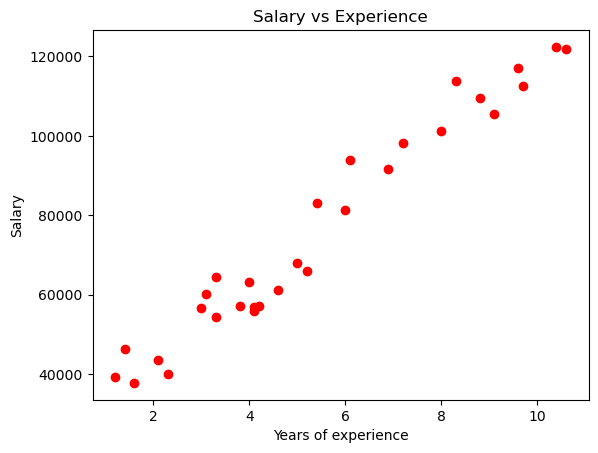

In [7]:
plt.scatter(X,Y,color='red')
plt.title("Salary vs Experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [8]:
class SimpleLinearRegression:
    def __init__(self):
        self.w = None
        self.b = None
        
    def fit(self, X_train, Y_train):
        x_mean = np.mean(X_train)
        y_mean = np.mean(Y_train)
        w = np.sum((X_train - x_mean) * (Y_train - y_mean)) / np.sum((X_train - x_mean) ** 2)
        b = y_mean - w * x_mean
        self.w = w
        self.b = b
    
    def predict(self, X_test):
        Y_pred = self.w*X_test + self.b
        return Y_pred

In [9]:
model = SimpleLinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [10]:
from sklearn.linear_model import LinearRegression
X_train_2d = X_train.reshape(-1, 1)
X_test_2d = X_test.reshape(-1, 1)
skmodel = LinearRegression()
skmodel.fit(X_train_2d, Y_train)
Y_pred = skmodel.predict(X_test_2d)
Y_pred

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

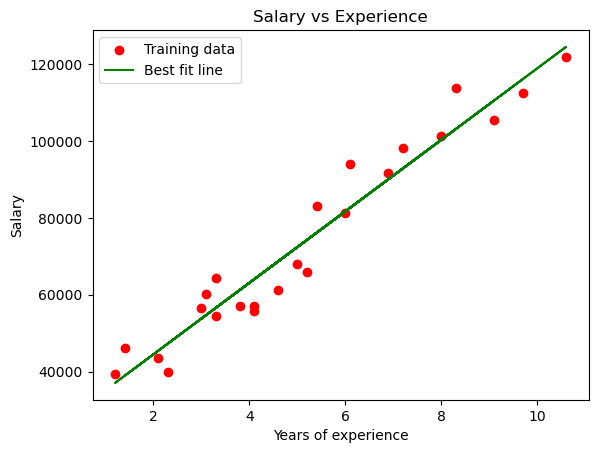

In [13]:
#visualize this best fit line
plt.scatter(X_train, Y_train, color='red', label='Training data')
plt.plot(X_train, model.w*X_train + model.b, color='green', label='Best fit line')
plt.title("Salary vs Experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.legend()
plt.show()